# problem 1

In [ ]:
#build index
(lab-week2) [~/qbb2020-answers/QUANT2020/data/Lab5/g1e]bowtie2-build chr19\ \(1\).fa chr19

In [ ]:
#put into terminal
for sample in CTCF_ER4 CTCF_G1E input_ER4 input_G1E
do
    bowtie2 -x Chr19/chr19 -U ${sample}.fastq -S ${sample}.sam -p 6
    samtools view -bSo ${sample}.bam ${sample}.sam
    samtools sort ${sample}.bam -o ${sample}.sorted.bam
    samtools index ${sample}.sorted.bam
done



# Check to see if bam is single or double reads

In [ ]:
samtools view -c -f 1 CTCF_G1E.bam

In [ ]:
samtools view -c -f 1 input_ER4.bam

# map CTCF_ER4

In [ ]:
macs2 callpeak -t CTCF_ER4.bam -c input_ER4.bam --format=BAM --name=CTCF_ER4 --gsize=61000000 --tsize=36

# map CTFC_G1E

In [ ]:
macs2 callpeak -t CTCF_G1E.bam -c input_G1E.bam --format=BAM --name=CTCF_G1E --gsize=61000000 --tsize=36

# Intersect files to find loss and gain


In [ ]:
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]bedtools intersect -a CTCF_G1E_peaks.narrowPeak -b CTCF_ER4_peaks.narrowPeak -v > intersectloss.bed
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]bedtools intersect -a CTCF_ER4_peaks.narrowPeak -b CTCF_G1E_peaks.narrowPeak -v > intersectgain.bed

In [ ]:
#compare to the mouse features

In [ ]:
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b CTCF_G1E_peaks.narrowPeak > G1EFeatures.bed
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b CTCF_ER4_peaks.narrowPeak > ER4Features.bed

In [28]:
# command line code to count feature occurence
## (cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]cut -f 4 G1EFeatures.bed | sort | uniq -c > G1Efeaturecount.text
## (cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]cut -f 4 ER4Features.bed | sort | uniq -c > ER4featurecount.text

In [ ]:
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]cut -f 4 feature_overlap.bed | sort | uniq -c > featurecount.text

In [ ]:
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]wc -l intersectloss.bed > countloss.txt
#(cmdb) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]wc -l intersectgain.bed > countgain.txt

In [ ]:
# Make Graphs!

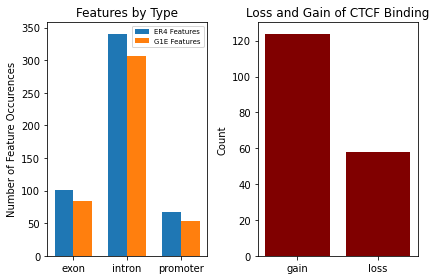

In [29]:
import matplotlib.pyplot as plt
import numpy as np
#define figure and data
fig, ax = plt.subplots(ncols=2)
#data set for features
label = ["exon","intron","promoter"]
ER4Feature = [101, 341,67]
G1EFeature = [84,307,54]

# creating the dataset for loss and again 
data = {'gain':124, 'loss':58} 
labels = list(data.keys()) 
gain_loss = list(data.values())

x = np.arange(len(label))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax[0].bar(x - width/2, ER4Feature, width, label='ER4 Features')
rects2 = ax[0].bar(x + width/2, G1EFeature, width, label='G1E Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Number of Feature Occurences')
ax[0].set_title('Features by Type')
ax[0].set_xticks(x)
ax[0].set_xticklabels(label)
ax[0].legend(loc='upper right', prop={'size': 7})

ax[1].bar(labels, gain_loss, color ='maroon') 
ax[1].set_title('Transitions of CTCF Binding of GR1 compaired to ER4')
ax[1].set_ylabel('Count')
fig.tight_layout()
plt.show()

# Part 2

In [ ]:
# sort and remove top 100

In [ ]:
[~/qbb2020-answers/QUANT2020/data/lab5/g1e]sort -nr -k7 CTCF_ER4_peaks.narrowPeak | head -n 100 > top100ER4.narrowPeak

In [ ]:
#find all the sequences that coorispond to the top 100 peaks

In [ ]:
bedtools getfasta -fi Chr9/chr19.fa -bed top100ER4.narrowPeak > 100ER4.fa

In [ ]:
#unzip library

In [ ]:
(lab-week2) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]tar -xvzf motif_databases.12.19.tgz

In [ ]:
#run meme-chip with max length 20 against the jaspar_core_2016 library

In [ ]:
(lab-week2) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]meme-chip -meme-maxw 20 -db motif_databases/JASPAR/JASPAR_CORE_2016.meme* 100ER4.fa

In [ ]:
#turn into pdf

In [ ]:
(lab-week2) [~/qbb2020-answers/QUANT2020/data/lab5/g1e]epstopdf logo.epf
